# Lab 6: Confidence Intervals

## William Olsen, partners with Jennifer Vo

Within this lab we will be using the data from the LHC in order to explore confidence intervals around measuring the Higgs.  This lab will be more focused on exploring the background rather than doing an in-depth exploration for the Higgs.

From work done in the previous lab, we identified that when searching for the Higgs Boson the background distribution at the ATLAS detector at the LHC is a Poisson distribution.  We will be using a Poisson distribution with parameter 100 which is not the same as the true parameter for the distribution but for sake of analysis we will use this parameter.

In [1]:
# general imports
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle

# general graphing setup
plt.rcParams["figure.figsize"] = (15,10)

## Problem 1

Now with our persumed background - a Poisson distribution with parameter 100 - let's determine the $5\sigma$ sensitivity threshold value for our distribution by answering the following question:

> What value must the background distribution - a Poisson with parameter 100 - produce such that the probability of producing that value is 5-sigma?

Let's answer this question:

In [2]:
def compute_poisson_sigma_value(lambda_, value):
    # determine the probability associated with this value
    value_prob = stats.poisson.sf(value, lambda_)

    # use the inverse survival function to determine the sigma that has the same associated probability
    sigma = stats.norm.isf(value_prob)

    return sigma

def compute_poisson_5sigma_value(lambda_):
    # define the sigma value
    sigma = 5

    # use the inverse survival function to determine the probability associated with 5sigma
    prob_sigma = stats.norm.sf(sigma)
    
    # determine the value associated with this probability
    value = stats.poisson.isf(prob_sigma, lambda_)

    return value

In [3]:
# define our variables
bkgd_lambda = 100

# determine the value associated with a 5-sigma probability
bkgd_5sigma_value = compute_poisson_5sigma_value(bkgd_lambda)
print(f'The value required for a 5-sigma probability for the background is {bkgd_5sigma_value}')

The value required for a 5-sigma probability for the background is 154.0


From the above, we found that the $5\sigma$ sensitivity threshold value for our background distribution - a Poisson with parameter 100 - is 154.0.

## Problem 2

Now we will explore injecting a signal of known strength (between the $8\sigma$ and $30\sigma$ values) into our background many times and we will make observations after doing such.

### Part A

Let's create a histogram for how bright the observed signal is after injecting a true signal of strength $8\sigma$ (which is equivalent to the value 190.0) into our background.

In [68]:
def compute_poisson_specific_sigma_value(sigma, lambda_):
    # use the inverse survival function to determine the probability associated with 5sigma
    prob_sigma = stats.norm.sf(sigma)
    
    # determine the value associated with this probability
    value = stats.poisson.isf(prob_sigma, lambda_)

    return value

# define the inject signal
inject_8sigma_value = compute_poisson_specific_sigma_value(8, bkgd_lambda)

# draw from the background many times
draw_bkgd = stats.poisson.rvs(bkgd_lambda, size=1000000)

# inject the signal
bkgd_injected = draw_bkgd + inject_8sigma_value

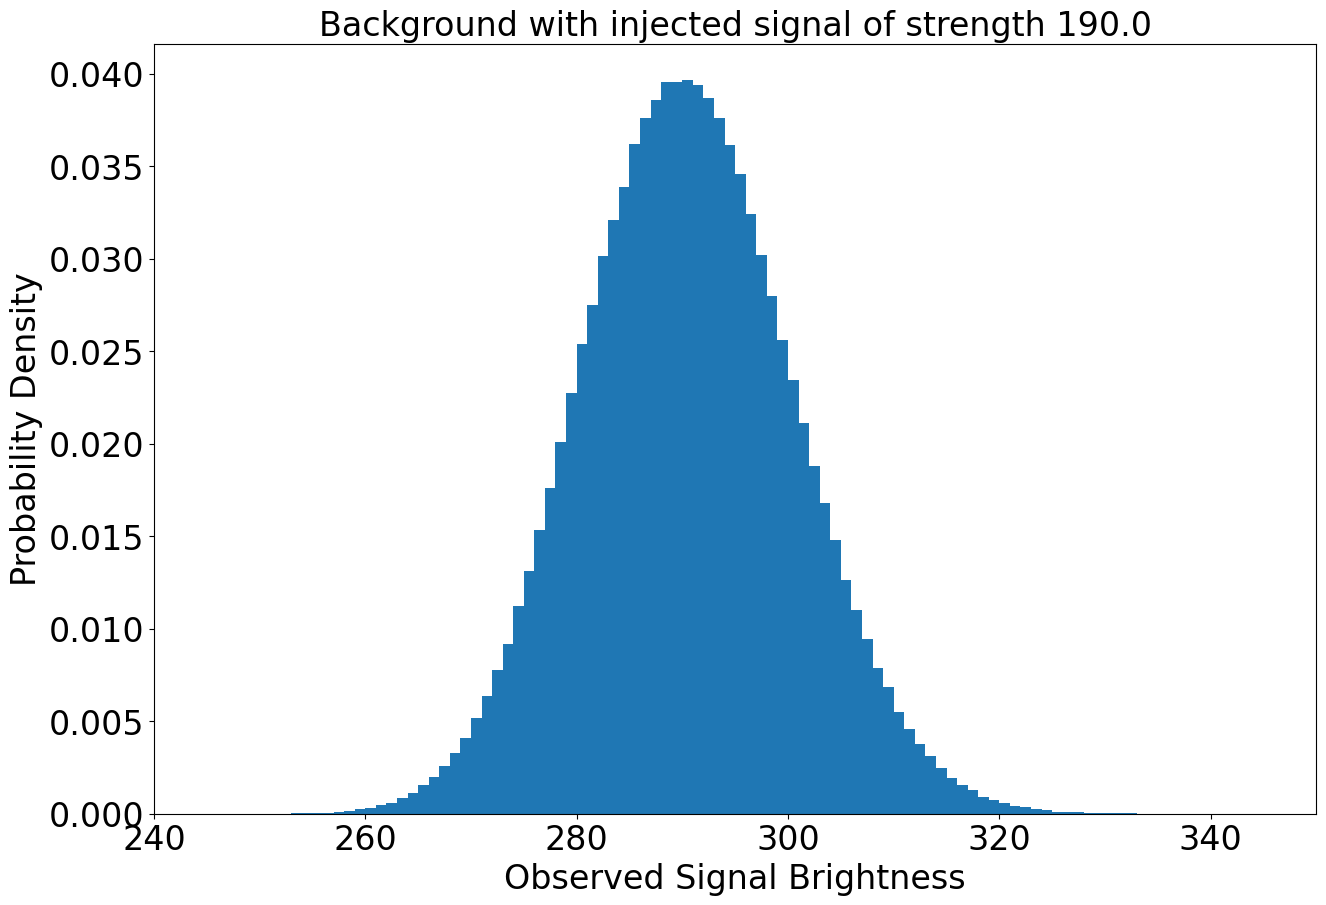

In [71]:
# plot the histogram
fs = 24
bin_count = 96
plt.hist(bkgd_injected, bins=bin_count, density=True)
plt.title('Background with injected signal of strength 190.0', fontsize=fs)
plt.tick_params(labelsize=fs)
plt.xlabel('Observed Signal Brightness', fontsize=fs)
plt.ylabel('Probability Density', fontsize=fs)
plt.xlim(240, 350)
plt.show()

For the Gaussian distribution, mean = 291.0 and the standard deviation = 10


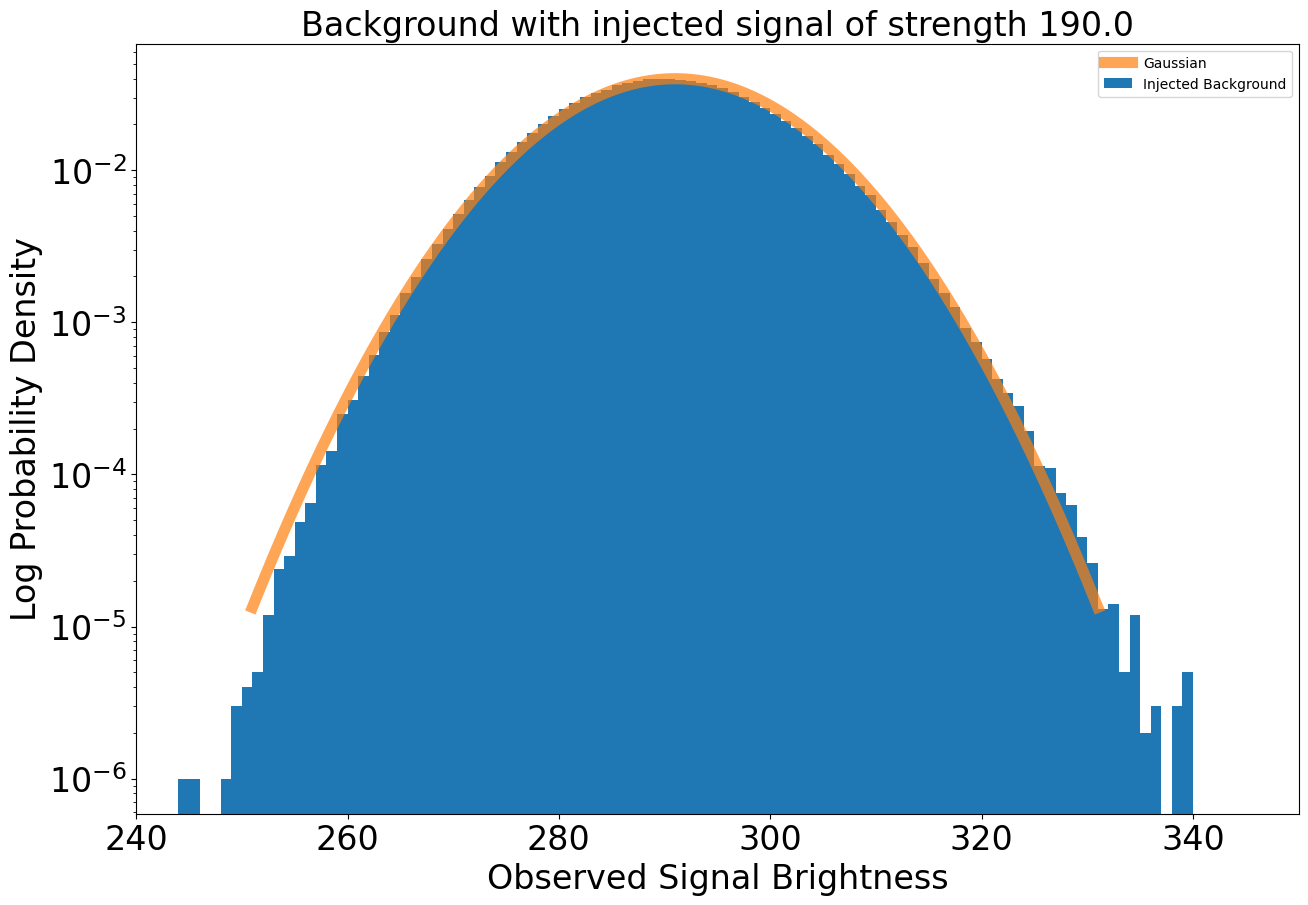

In [81]:
# plot the histogram on log scale
plt.hist(bkgd_injected, bins=bin_count, label='Injected Background', density=True)
plt.title('Background with injected signal of strength 190.0', fontsize=fs)
plt.yscale('log')
plt.tick_params(labelsize=fs)
plt.xlabel('Observed Signal Brightness', fontsize=fs)
plt.ylabel('Log Probability Density', fontsize=fs)
plt.xlim(240, 350)

# plot a gaussian on the same plot
gaus_mean = bkgd_lambda + inject_8sigma_value + 1
gaus_range = 40
gaus_std = 10
print(f'For the Gaussian distribution, mean = {gaus_mean} and the standard deviation = {gaus_std}')
gaus_xs = np.linspace(gaus_mean - gaus_range, gaus_mean + gaus_range, 1000)
gaus_ys = stats.norm.pdf(gaus_xs, loc=gaus_mean, scale=gaus_std)
plt.plot(gaus_xs, gaus_ys, linewidth=8, alpha=0.7, label="Gaussian")
plt.legend()

plt.show()

In the above plot we see that the central limit theorem is in play.  We have drawn many samples from our background distribution of a Poisson with parameter 100 that also has a true signal of 190 injected.  In drawing these many samples and creating a histogram we have converged to a Gaussian.  The gaussian that we have converged to has, approximately, a mean of 291.0 and standard deviation of 10.0.

Specifically, the above histogram is telling us the probabilities associated with measuring specific observed signal brightness values provided that we have injected a signal of 190.0 into our experiment.  We see that injecting this signal has moved the mean of our background to no longer be centered around 100 but rather it is now centered around a higher value of, approximately, 291.0.  

The histogram is a probability density function for the observed signal brightness provided an injected signal of magnitude 190.

### Part B

Analyzing the resulting injected distribution further we can conclude that the distribution is biased with respect to the injected signal. All of the values in our distribution have a brightness higher than the brightness of the injected signal - observed values with a brightness larger than the injected signal are much more likely than observed values with a brightness smaller than the injected signal.  Specifically, we see that it is incredibly improbable for the injected distribution to produce the injected signal.  This bias is not suprising as our original background distirbution is a Poisson which can only take on positive values, thus when injecting signals the stronger the injected signal is, the lower the probability will be for the injected distribution to produce said injected signal.

We also have found that the injected distribution is a symmetric distribution as it is a Gaussian.  It is of note that while the distribution is symmetric, it is symmetric about it's mean value of 291.0 rather than symmetric about the injected signal value of 190.0.

## Problem 3

